In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

In [2]:
data=pd.read_csv("LabTAT.csv")
data

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


In [3]:
data=data.rename({'Laboratory 1':'Laboratory_1','Laboratory 2':'Laboratory_2','Laboratory 3':'Laboratory_3','Laboratory 4':'Laboratory_4'},axis=1)

In [4]:
data

,Laboratory_1,Laboratory_2,Laboratory_3,Laboratory_4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


In [5]:
data.describe()

,Laboratory_1,Laboratory_2,Laboratory_3,Laboratory_4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory_1  120 non-null    float64
 1   Laboratory_2  120 non-null    float64
 2   Laboratory_3  120 non-null    float64
 3   Laboratory_4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


In [7]:
data.mean()

Laboratory_1    178.361583
Laboratory_2    178.902917
Laboratory_3    199.913250
Laboratory_4    163.682750
dtype: float64

In [8]:
#H0:μ1=μ2=μ3=μ4
#Ha:μ1≠μ2≠μ3≠μ4

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

<AxesSubplot:xlabel='Laboratory_4', ylabel='Density'>

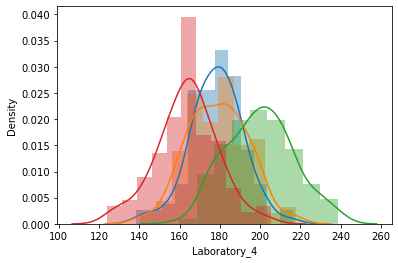

In [9]:
sns.distplot(data['Laboratory_1'])
sns.distplot(data['Laboratory_2'])
sns.distplot(data['Laboratory_3'])
sns.distplot(data['Laboratory_4'])

In [10]:
lab1=data['Laboratory_1']
lab2=data['Laboratory_2']
lab3=data['Laboratory_3']
lab4=data['Laboratory_1']
print(lab1,lab2,lab3,lab4)

0      185.35
1      170.49
2      192.77
3      177.33
4      193.41
        ...  
115    178.49
116    176.08
117    202.48
118    182.40
119    182.09
Name: Laboratory_1, Length: 120, dtype: float64 0      165.53
1      185.91
2      194.92
3      183.00
4      169.57
        ...  
115    170.66
116    183.98
117    174.54
118    197.18
119    215.17
Name: Laboratory_2, Length: 120, dtype: float64 0      176.70
1      198.45
2      201.23
3      199.61
4      204.63
        ...  
115    193.80
116    215.25
117    203.99
118    194.52
119    221.49
Name: Laboratory_3, Length: 120, dtype: float64 0      185.35
1      170.49
2      192.77
3      177.33
4      193.41
        ...  
115    178.49
116    176.08
117    202.48
118    182.40
119    182.09
Name: Laboratory_1, Length: 120, dtype: float64


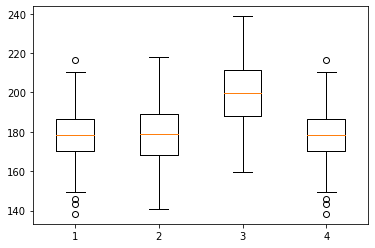

In [11]:
box_plot_data=[lab1,lab2,lab3,lab4]
plt.boxplot(box_plot_data)
plt.show()

In [12]:
tStat, pvalue = sp.stats.f_oneway(lab1,lab2,lab3,lab4)
print("P-Value:{0} T-Statistic:{1}".format(pvalue,tStat))

P-Value:3.2318872286662227e-35 T-Statistic:64.94851005731616


In [13]:
if pvalue < 0.05:
  print('we reject null hypothesis')
else:
  print('we accept null hypothesis')

we reject null hypothesis


In [14]:
#we reject null hypothesis
#we can say that these are not equal i.e Average of atleast 1 laboratory are different